In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


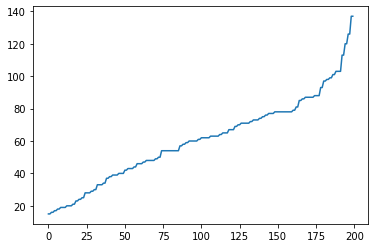

In [ ]:
plt.plot(df['Annual Income (k$)'])
plt.show()

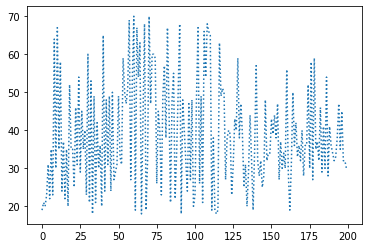

In [ ]:
data=np.array(df['Age'])
plt.plot(data,linestyle = 'dotted')

<AxesSubplot:ylabel='Density'>

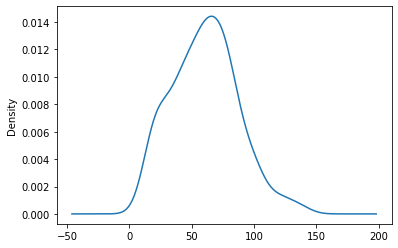

In [ ]:
df['Annual Income (k$)'].plot(kind='density')

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

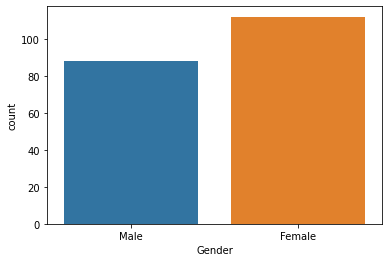

In [ ]:
sns.countplot(df['Gender'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

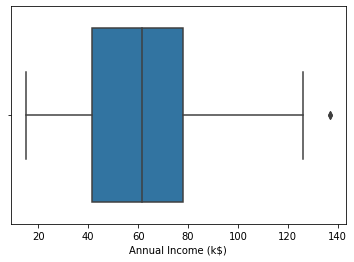

In [ ]:
box = sns.boxplot(df['Annual Income (k$)'])
box

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

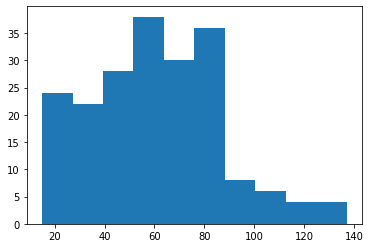

In [ ]:
plt.hist(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

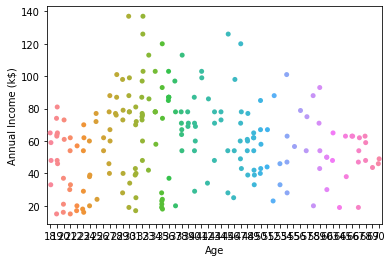

In [ ]:
sns.stripplot(x=df['Age'],y=df['Annual Income (k$)'])

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

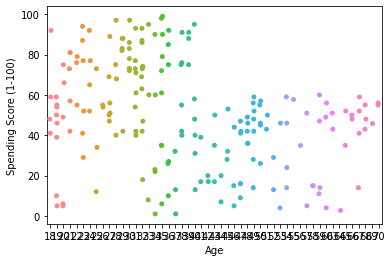

In [ ]:
sns.stripplot(x=df['Age'],y=df['Spending Score (1-100)'])

Text(0, 0.5, 'Annual Income (k$)')

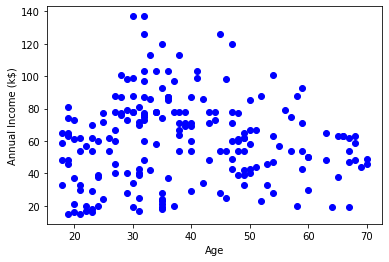

In [ ]:
plt.scatter(df['Age'],df['Annual Income (k$)'],color='blue')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

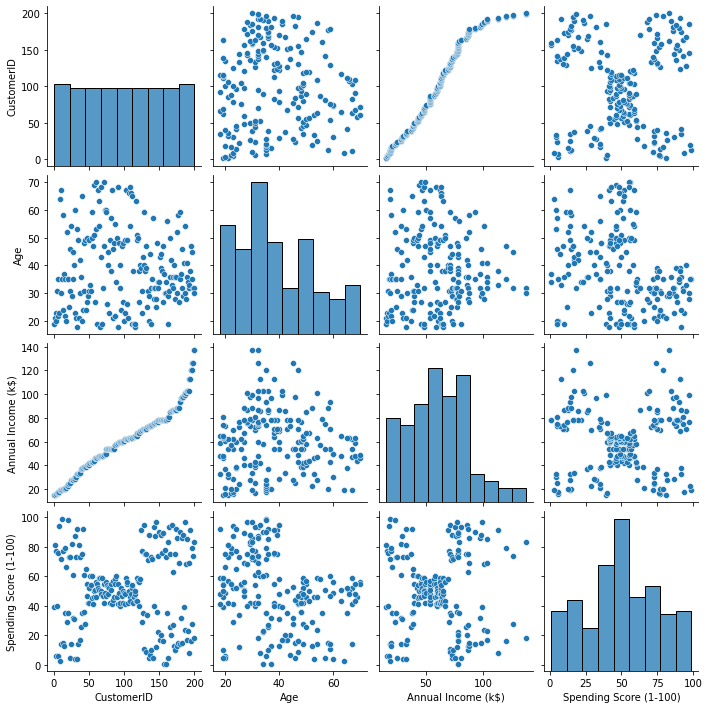

In [ ]:
sns.pairplot(df)

<AxesSubplot:>

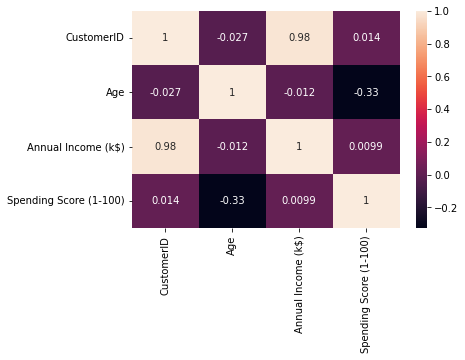

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_whisker,upper_whisker,np.where(df['Annual Income (k$)']<lower_whisker,lower_whisker,df['Annual Income (k$)']))

In [ ]:
numeric_data = df.select_dtypes(include=[np.number]) 
categorical_data = df.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [ ]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
df["Gender"] = label

In [ ]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [ ]:
#Scaling the data
X = df.drop("Age",axis=1)
Y = df['Age']

In [ ]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.74542941 -0.43480148]
 [-1.70609137  1.12815215 -1.74542941  1.19570407]
 [-1.68877065 -0.88640526 -1.70708307 -1.71591298]
 [-1.67144992 -0.88640526 -1.70708307  1.04041783]
 [-1.6541292  -0.88640526 -1.66873673 -0.39597992]
 [-1.63680847 -0.88640526 -1.66873673  1.00159627]
 [-1.61948775 -0.88640526 -1.6303904  -1.71591298]
 [-1.60216702 -0.88640526 -1.6303904   1.70038436]
 [-1.5848463   1.12815215 -1.59204406 -1.83237767]
 [-1.56752558 -0.88640526 -1.59204406  0.84631002]
 [-1.55020485  1.12815215 -1.59204406 -1.4053405 ]
 [-1.53288413 -0.88640526 -1.59204406  1.89449216]
 [-1.5155634  -0.88640526 -1.55369772 -1.36651894]
 [-1.49824268 -0.88640526 -1.55369772  1.04041783]
 [-1.48092195  1.12815215 -1.55369772 -1.44416206]
 [-1.46360123  1.12815215 -1.55369772  1.11806095]
 [-1.4462805  -0.88640526 -1.51535138 -0.59008772]
 [-1.42895978  1.12815215 -1.51535138  0.61338066]
 [-1.41163905  1.12815215 -1.43865871 -0.82301709]
 [-1.39431833 -0.88640526 -1.43

In [ ]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.745429,-0.434801
1,-1.706091,1.128152,-1.745429,1.195704
2,-1.688771,-0.886405,-1.707083,-1.715913
3,-1.671450,-0.886405,-1.707083,1.040418
4,-1.654129,-0.886405,-1.668737,-0.395980
...,...,...,...,...
195,1.654129,-0.886405,2.280936,1.118061
196,1.671450,-0.886405,2.511014,-0.861839
197,1.688771,1.128152,2.511014,0.923953
198,1.706091,1.128152,2.769852,-1.250054


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)

In [ ]:
X_train.shape

(160, 4)

In [ ]:
X_test.shape

(40, 4)

In [ ]:
#Clustering Algorithm
x = df.iloc[:, [3, 4]].values 

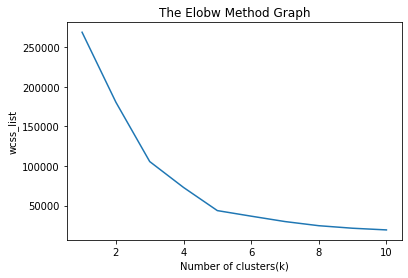

In [ ]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

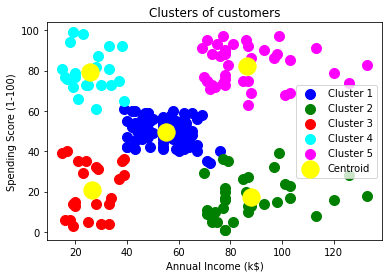

In [ ]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  